### Importación de datos.



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. **Análisis de facturación.**



####Facturación total por cada tienda. 🛒




In [89]:
# Inicializamos
from matplotlib import pyplot as plt
import numpy as np

tiendas = ['tienda1', 'tienda2','tienda3','tienda4']
colores = ['#FF8C2A', '#32A7E5', '#00C86F', '#9CD33B']

In [90]:
def facturacion(tienda):
  precio = sum(tienda['Precio'])
  return precio

facturas_tienda = []

for t in tiendas:
  print(f"La facturación de la tienda {t} es de ${facturacion(eval(t)):,}")
  facturas_tienda.append(facturacion(eval(t)))

La facturación de la tienda tienda1 es de $1,150,880,400.0
La facturación de la tienda tienda2 es de $1,116,343,500.0
La facturación de la tienda tienda3 es de $1,098,019,600.0
La facturación de la tienda tienda4 es de $1,038,375,700.0


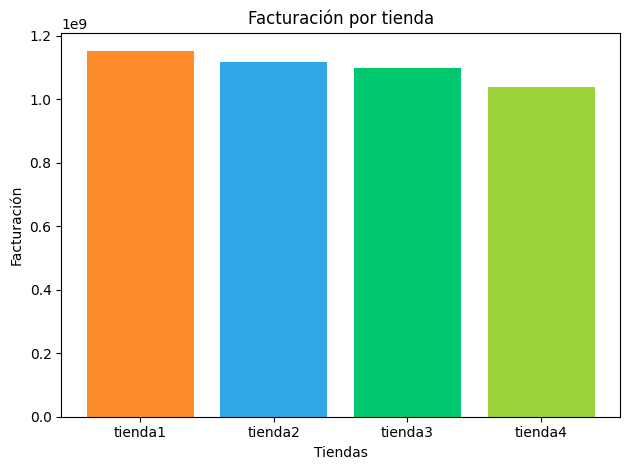

In [91]:
x = tiendas
y = facturas_tienda

plt.bar(x, y, color= colores)
plt.xlabel("Tiendas")
plt.ylabel("Facturación")
plt.title("Facturación por tienda")
plt.tight_layout()
plt.show()

####Resumen de facturación. 📎

In [92]:
facturacion_total = 0
porcentajes_tienda = []

for t in tiendas:
  tienda = eval(t)
  facturacion_total += facturacion(tienda)

for i, t in enumerate(tiendas):
    porcentaje = (facturas_tienda[i] / facturacion_total) * 100
    print(f"La {t} facturó ${facturas_tienda[i]:,} → {porcentaje:.2f}% del total")
    porcentajes_tienda.append(porcentaje)

print(f"\nLa facturación total de las tiendas es de ${facturacion_total:,}")

La tienda1 facturó $1,150,880,400.0 → 26.13% del total
La tienda2 facturó $1,116,343,500.0 → 25.35% del total
La tienda3 facturó $1,098,019,600.0 → 24.93% del total
La tienda4 facturó $1,038,375,700.0 → 23.58% del total

La facturación total de las tiendas es de $4,403,619,200.0


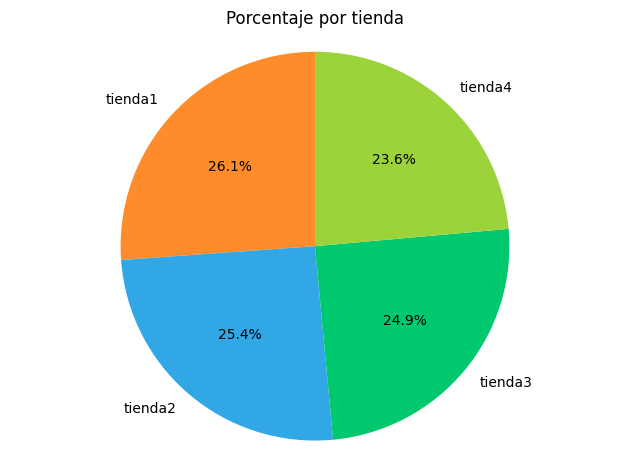

In [93]:
x = tiendas
y = porcentajes_tienda

plt.pie(y, labels=x, colors=colores, autopct='%1.1f%%', startangle=90)
plt.title("Porcentaje por tienda")
plt.axis('equal')
plt.tight_layout()
plt.show()

# 2. **Ventas por categoría.**

In [75]:
def categorias(tienda):
    return tienda['Categoría del Producto'].value_counts()

mas_vendida = []
menos_vendida = []
categorias_tienda = []

for t in tiendas:
    tienda = eval(t)
    mas_vendida.append(categorias(tienda).idxmax())
    menos_vendida.append(categorias(tienda).idxmin())
    categorias_tienda.append(sum(categorias(tienda)))

    print(f"Categoría de los productos {t}:\n{categorias(tienda)}\n")
    print(f"Las ventas totales por {t} es: {sum(categorias(tienda))}")
    print(f"La categoría más vendida por {t} es: {categorias(tienda).idxmax()}")
    print(f"La categoría menos vendida por {t} es: {categorias(tienda).idxmin()}\n")

Categoría de los productos tienda1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Las ventas totales por tienda1 es: 2359
La categoría más vendida por tienda1 es: Muebles
La categoría menos vendida por tienda1 es: Artículos para el hogar

Categoría de los productos tienda2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Las ventas totales por tienda2 es: 2359
La categoría más vendida por tienda2 es: Muebles
La categoría menos vendida por tienda2 es: Artículos para el hogar

Categoría de los p

La categoría más vendida por tienda1 es: Muebles
La categoría más vendida por tienda2 es: Muebles
La categoría más vendida por tienda3 es: Muebles
La categoría más vendida por tienda4 es: Muebles


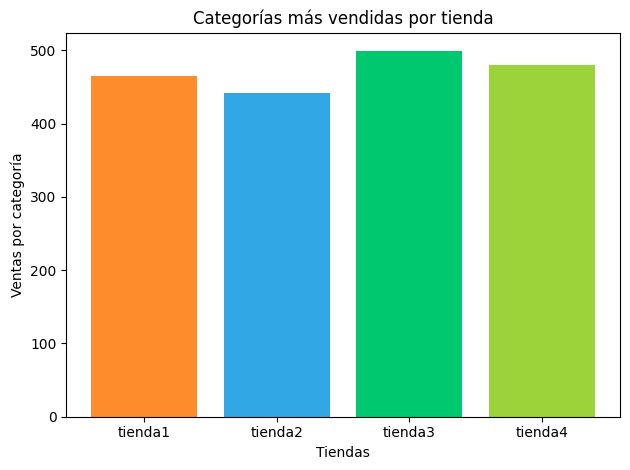

In [76]:
categorias_mas_vendidas = [] # Aqui esta la cantidad de ventas de la categoría mas_vendida

for i in range(len(tiendas)):
    categorias_mas_vendidas.append(categorias(eval(tiendas[i])).max())
    print(f"La categoría más vendida por {tiendas[i]} es: {mas_vendida[i]}")

x = tiendas
y = categorias_mas_vendidas

plt.bar(x, y, color= colores)
plt.xlabel("Tiendas")
plt.ylabel("Ventas por categoría")
plt.title("Categorías más vendidas por tienda")
plt.tight_layout()
plt.show()

# 3. **Calificación promedio de la tienda.**


In [80]:
def producto(tienda):
  return tienda['Producto'].value_counts()

def calificaciones(tienda):
  return tienda['Calificación'].mean()

productos_tienda = []
satisfacion_tienda = []

for t in tiendas:
  print(f"La calificación promedio de la {t} es: {calificaciones(eval(t)):.2f}")
  productos_tienda.append(producto(eval(t)))
  satisfacion_tienda.append(calificaciones(eval(t)))

La calificación promedio de la tienda1 es: 3.98
La calificación promedio de la tienda2 es: 4.04
La calificación promedio de la tienda3 es: 4.05
La calificación promedio de la tienda4 es: 4.00


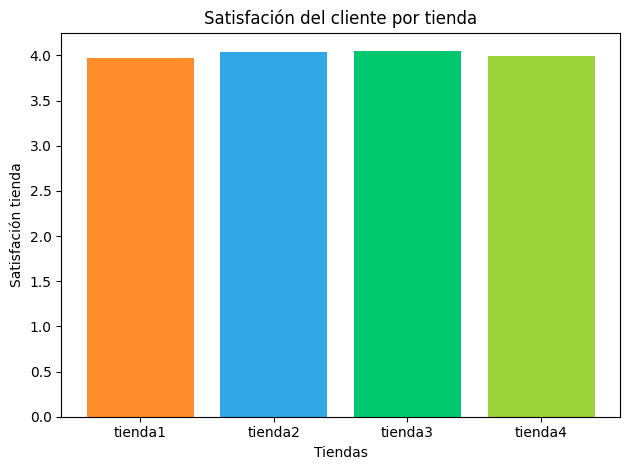

In [83]:
x = tiendas
y = satisfacion_tienda

plt.bar(x, y, color= colores)
plt.xlabel("Tiendas")
plt.ylabel("Satisfación tienda")
plt.title("Satisfación del cliente por tienda")
plt.tight_layout()
plt.show()

# 4. **Productos más y menos vendidos.**

In [85]:
producto_mas_vendido = []
producto_menos_vendido = []

for t in tiendas:
  print(f"El producto más vendido por {t} es: {producto(tienda).idxmax()} ")
  producto_mas_vendido.append(producto(tienda).max())
  print(f"El producto menos vendido por {t} es: {producto(tienda).idxmin()}\n")
  producto_menos_vendido.append(producto(tienda).min())


El producto más vendido por tienda1 es: Cama box 
El producto menos vendido por tienda1 es: Guitarra eléctrica

El producto más vendido por tienda2 es: Cama box 
El producto menos vendido por tienda2 es: Guitarra eléctrica

El producto más vendido por tienda3 es: Cama box 
El producto menos vendido por tienda3 es: Guitarra eléctrica

El producto más vendido por tienda4 es: Cama box 
El producto menos vendido por tienda4 es: Guitarra eléctrica



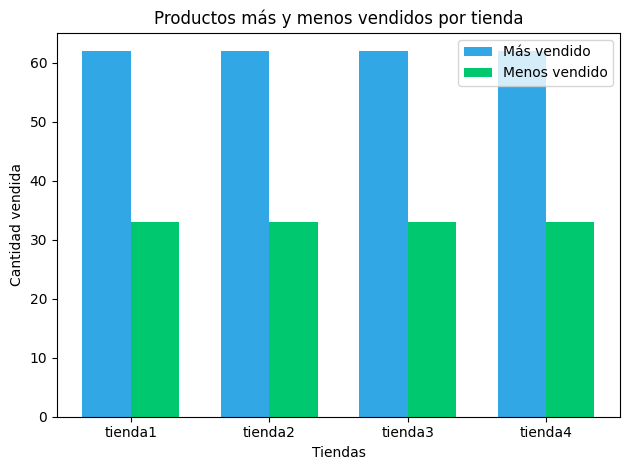

In [98]:
x = np.arange(len(tiendas))  # posiciones en el eje x
width = 0.35  # ancho de cada barra

plt.bar(x - width/2, producto_mas_vendido, width, label='Más vendido', color= "#32A7E5")
plt.bar(x + width/2, producto_menos_vendido, width, label='Menos vendido', color= '#00C86F')

plt.xlabel("Tiendas")
plt.ylabel("Cantidad vendida")
plt.title("Productos más y menos vendidos por tienda")
plt.xticks(x, tiendas)  # poner etiquetas correctas en el eje x
plt.legend()
plt.tight_layout()
plt.show()

# 5. **Envío promedio por tienda.**

####Envío promedio por cada tienda. 👩‍💻

In [118]:
def costo_envio_promedio(tienda):
  return tienda['Costo de envío'].mean()

costo_envio_promedio_tienda = []

for t in tiendas:
  print(f"El costo de envío promedio de la tienda {t} es de ${costo_envio_promedio(eval(t)):,.2f}")
  costo_envio_promedio_tienda.append(costo_envio_promedio(eval(t)))

El costo de envío promedio de la tienda tienda1 es de $26,018.61
El costo de envío promedio de la tienda tienda2 es de $25,216.24
El costo de envío promedio de la tienda tienda3 es de $24,805.68
El costo de envío promedio de la tienda tienda4 es de $23,459.46


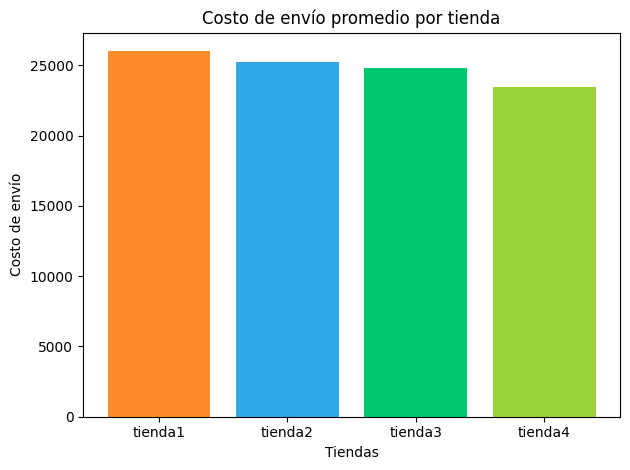

In [129]:
x = tiendas
y = costo_envio_promedio_tienda

plt.bar(x, y, color= colores)
plt.xlabel("Tiendas")
plt.ylabel("Costo de envío")
plt.title("Costo de envío promedio por tienda")
plt.tight_layout()
plt.show()

####Costos de envío por cada tienda. ✍

In [120]:
def costo_envio(tienda):
  costo = sum(tienda['Costo de envío'])
  return costo

costos_envios_tiendas = []

for t in tiendas:
  print(f"El costo de envío de la tienda {t} es de ${costo_envio(eval(t)):,}")
  costos_envios_tiendas.append(costo_envio(eval(t)))

El costo de envío de la tienda tienda1 es de $61,377,900.0
El costo de envío de la tienda tienda2 es de $59,485,100.0
El costo de envío de la tienda tienda3 es de $58,516,600.0
El costo de envío de la tienda tienda4 es de $55,317,400.0


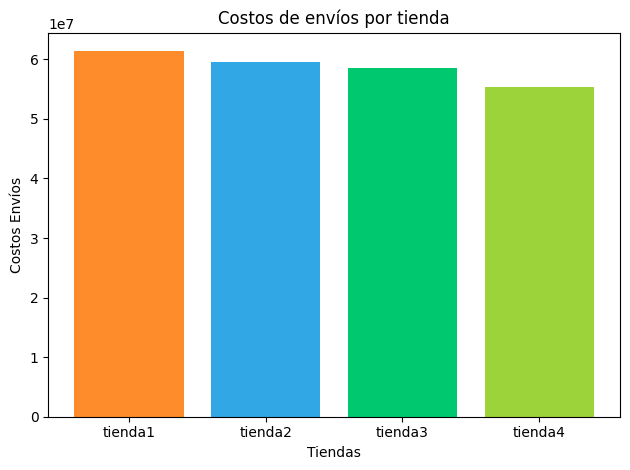

In [121]:
x = tiendas
y = costos_envios_tiendas

plt.bar(x, y, color= colores)
plt.xlabel("Tiendas")
plt.ylabel("Costos Envíos")
plt.title("Costos de envíos por tienda")
plt.tight_layout()
plt.show()

####Utilidad por cada tienda. 📑

In [122]:
def utilidad(tienda):
  facturacion(tienda)
  costo_envio(tienda)
  utilidad = int(facturacion(tienda) - costo_envio(tienda))
  return utilidad

utilidades_tienda = []

for t in tiendas:
  print(f"La utilidad de la tienda {t} es de ${utilidad(eval(t)):,}")
  utilidades_tienda.append(utilidad(eval(t)))

La utilidad de la tienda tienda1 es de $1,089,502,500
La utilidad de la tienda tienda2 es de $1,056,858,400
La utilidad de la tienda tienda3 es de $1,039,503,000
La utilidad de la tienda tienda4 es de $983,058,300


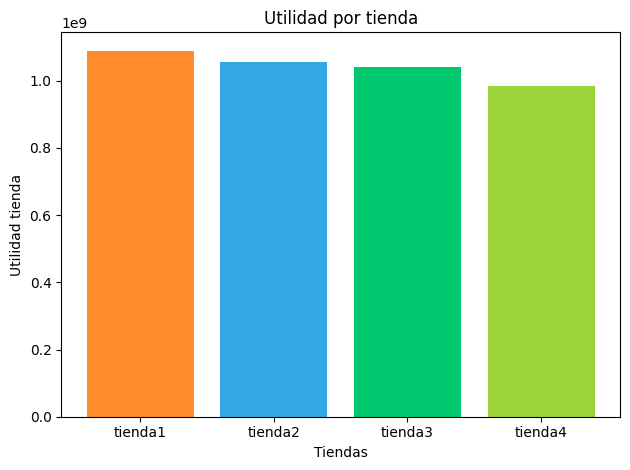

In [123]:
x = tiendas
y = utilidades_tienda

plt.bar(x, y, color= colores)
plt.xlabel("Tiendas")
plt.ylabel("Utilidad tienda")
plt.title("Utilidad por tienda")
plt.tight_layout()
plt.show()

# 6. **Informe Final.**

📝 Informe final: Análisis para decidir qué tienda vender para invertir en un nuevo negocio
--
📌 Introducción
---
El propósito de este análisis es identificar cuál de las cuatro tiendas disponibles es la más conveniente para que el Sr. Juan venda su negocio. El criterio de decisión es seleccionar aquella tienda que presenta un desempeño global menor, ya que puede representar una oportunidad estratégica de inversión.

El análisis se realizó considerando datos clave: facturación, categorías de productos más y menos vendidas, calificaciones promedio de los clientes, productos más y menos vendidos y el coste de envío promedio por tienda.

📊 Desarrollo del análisis
--
✅ Facturación total de las tiendas
Se calculó la facturación total de cada tienda:

Tienda1: $1,150,880,400 → 26.13% del total

Tienda2: $1,116,343,500 → 25.35% del total

Tienda3: $1,098,019,600 → 24.93% del total

Tienda4: $1,038,375,700 → 23.58% del total

La tienda con menor facturación es la tienda4, lo que indica un menor volumen de ventas actual y, por lo tanto, potencial de crecimiento si se gestiona correctamente.

📦 Categorías más y menos vendidas
--
En todas las tiendas, la categoría más vendida es Muebles, pero las categorías menos vendidas varían:

Tienda1 y tienda2: Artículos para el hogar

Tienda3 y tienda4: Instrumentos musicales

Esto muestra que, aunque hay una demanda similar por categorías más populares, la tienda4 tiene menor rotación en ciertas categorías, reflejando menor dinamismo en su oferta.

⭐ Calificaciones promedio de los clientes
--
Tienda1: 3.98

Tienda2: 4.04

Tienda3: 4.05

Tienda4: 4.00

Aunque la tienda4 no tiene la calificación más baja, sí está por debajo del promedio general de las otras tiendas. Esto sugiere una percepción del cliente ligeramente menos positiva.

📈 Productos más y menos vendidos
--
En todas las tiendas el producto más vendido es Cama box, y el menos vendido es Guitarra eléctrica. Este patrón indica que la tienda4 no presenta diferencia en su portafolio respecto a las demás, pero el volumen global de ventas sigue siendo menor.

🚚 Coste de envío promedio por tienda
--
Tienda1: $26,018.61

Tienda2: $25,216.24

Tienda3: $24,805.68

Tienda4: $23,459.46

La tienda4 tiene el coste de envío promedio más bajo, lo que puede convertirse en una ventaja competitiva para reducir gastos operativos.

💰 Utilidad total de las tiendas
--
Tienda1: $1,089,502,500

Tienda2: $1,056,858,400

Tienda3: $1,039,503,000

Tienda4: $983,058,300

Nuevamente, la tienda4 tiene la utilidad más baja, reflejando un desempeño financiero general inferior.

✅ Conclusión y recomendación
--
Tras analizar los diferentes indicadores:

Facturación más baja: tienda4

Utilidad más baja: tienda4

Coste de envío más bajo: tienda4

Calificación promedio más baja (después de tienda1): tienda4

Menor dinamismo en categorías menos vendidas

r representa una oportunidad estratégica para invertir, revitalizar el negocio y aumentar su participación de mercado.
Invertir en la tienda con resultados más bajos permite aprovechar costes más bajos, menos competencia interna y un mayor margen para implementar mejoras que incrementen ventas y reputación.

✅ Recomendación final:
--
Se recomienda que el Sr. Juan venda la tienda4, ya que presenta el desempeño global más bajo. De esta forma, podrá aprovechar su situación actual para obtener liquidez y así invertir en un nuevo negocio que le ofrezca mejores perspectivas de crecimiento.